In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Gradient boosting
from xgboost import XGBClassifier
import lightgbm as lgb

# Warning handling
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

## Cleaning Data

In [3]:
data = pd.read_csv('originalData.csv')
columns = list(data.columns)
print(columns)

['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX', 'NUMADULT', 'LANDSEX', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'BPHIGH6', 'BPMEDS', 'CHOLCHK3', 'TOLDHI3', 'CHOLMED3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'DIABAGE3', 'HAVARTH5', 'ARTHEXER', 'ARTHEDU', 'LMTJOIN3', 'ARTHDIS2', 'JOINPAI2', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL3', 'NUMPHON3', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'USENOW3', 'ECIGNOW1', 'ALCDAY5', 'AVE

In [4]:
filter_columns = ['_STATE','GENHLTH', 'EXERANY2', 'CVDCRHD4', 'CHCSCNCR', 'CHCOCNCR', 'ADDEPEV3', 'DIABETE4', 'SEXVAR', '_AGE_G', 'HTM4', 'WTKG3', '_BMI5CAT', 'SMOKE100', 'DRNKANY5', '_FRUTSU1', '_VEGESU1', 'FRENCHF1', 'BPHIGH6', 'HAVARTH5', 'TOLDHI3', 'ASTHMA3', 'FMONTH']
rename_columns = ['State','General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Vegetables_Consumption', 'FriedPotato_Consumption', "Hypertension", 'Arthritis', 'High_Cholesterol', 'Asthma', "Month"]

In [5]:
df = data.copy()
df = df[filter_columns]
df.head()

,_STATE,GENHLTH,EXERANY2,CVDCRHD4,CHCSCNCR,CHCOCNCR,ADDEPEV3,DIABETE4,SEXVAR,_AGE_G,...,SMOKE100,DRNKANY5,_FRUTSU1,_VEGESU1,FRENCHF1,BPHIGH6,HAVARTH5,TOLDHI3,ASTHMA3,FMONTH
0,1.0,5.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,6.0,...,1.0,2.0,100.0,214.0,203.0,3.0,1.0,1.0,1.0,1.0
1,1.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,6.0,...,2.0,2.0,100.0,128.0,555.0,1.0,1.0,1.0,2.0,1.0
2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,6.0,...,2.0,2.0,100.0,71.0,201.0,1.0,2.0,2.0,2.0,1.0
3,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,...,2.0,1.0,114.0,165.0,204.0,1.0,2.0,1.0,2.0,1.0
4,1.0,5.0,1.0,7.0,2.0,2.0,2.0,1.0,1.0,6.0,...,2.0,2.0,100.0,258.0,202.0,4.0,2.0,1.0,2.0,1.0


In [6]:
columns_to_clean = {
    'GENHLTH': [7, 9],
    'EXERANY2': [7, 9],
    'CVDCRHD4': [7, 9],
    'CHCSCNCR': [7, 9],
    'CHCOCNCR': [7, 9],
    'SMOKE100': [7, 9],
    'DRNKANY5': [7, 9],
    'HAVARTH5': [7, 9],
    'TOLDHI3': [7, 9],
    'ASTHMA3': [7, 9],
    'ADDEPEV3': [7, 9],
    'DIABETE4': [2, 7, 9],
    'BPHIGH6': [2, 7, 9]
}

for col, values in columns_to_clean.items():
    df = df[df[col].map(lambda x: x not in values)]

In [7]:
df.dropna(inplace=True)
df = df.drop_duplicates()

In [8]:
df.head()

,_STATE,GENHLTH,EXERANY2,CVDCRHD4,CHCSCNCR,CHCOCNCR,ADDEPEV3,DIABETE4,SEXVAR,_AGE_G,...,SMOKE100,DRNKANY5,_FRUTSU1,_VEGESU1,FRENCHF1,BPHIGH6,HAVARTH5,TOLDHI3,ASTHMA3,FMONTH
0,1.0,5.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,6.0,...,1.0,2.0,100.0,214.0,203.0,3.0,1.0,1.0,1.0,1.0
2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,6.0,...,2.0,2.0,100.0,71.0,201.0,1.0,2.0,2.0,2.0,1.0
3,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,5.0,...,2.0,1.0,114.0,165.0,204.0,1.0,2.0,1.0,2.0,1.0
5,1.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,6.0,...,1.0,2.0,29.0,42.0,555.0,3.0,2.0,2.0,2.0,1.0
6,1.0,3.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,5.0,...,2.0,2.0,43.0,122.0,203.0,1.0,1.0,2.0,2.0,1.0


In [9]:
# Reverse values in 'GENHLTH' column
df['GENHLTH'] = df['GENHLTH'].max() - df['GENHLTH']

# List of columns to replace 2 with 0
columns_to_replace_2 = ['EXERANY2', 'CVDCRHD4', 'CHCSCNCR', 'CHCOCNCR', 'ADDEPEV3', 'SMOKE100', 'DRNKANY5', 'HAVARTH5', 'TOLDHI3', 'ASTHMA3']

for col in columns_to_replace_2:
    df[col] = df[col].replace(2, 0)

# List of columns to replace 3 and 4 with 0
columns_to_replace_3_4 = ['DIABETE4', 'BPHIGH6']

for col in columns_to_replace_3_4:
    df[col] = df[col].replace({3: 0, 4: 0})

In [10]:
df.head()

,_STATE,GENHLTH,EXERANY2,CVDCRHD4,CHCSCNCR,CHCOCNCR,ADDEPEV3,DIABETE4,SEXVAR,_AGE_G,...,SMOKE100,DRNKANY5,_FRUTSU1,_VEGESU1,FRENCHF1,BPHIGH6,HAVARTH5,TOLDHI3,ASTHMA3,FMONTH
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,...,1.0,0.0,100.0,214.0,203.0,0.0,1.0,1.0,1.0,1.0
2,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,6.0,...,0.0,0.0,100.0,71.0,201.0,1.0,0.0,0.0,0.0,1.0
3,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,...,0.0,1.0,114.0,165.0,204.0,1.0,0.0,1.0,0.0,1.0
5,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,...,1.0,0.0,29.0,42.0,555.0,0.0,0.0,0.0,0.0,1.0
6,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,...,0.0,0.0,43.0,122.0,203.0,1.0,1.0,0.0,0.0,1.0


In [11]:
df.shape

(283385, 23)

In [12]:
states =pd.read_csv('BRFSS states 2021.csv')
states.head()

,Value,Value Label,Frequency,Percentage,Percentage.1
0,1,Alabama,"4,586",1.05,1.60
1,2,Alaska,"5,493",1.25,0.23
2,4,Arizona,"10,654",2.43,2.27
3,5,Arkansas,"5,372",1.22,0.95
4,6,California,"6,735",1.54,12.55


In [13]:
# make dictionary of state names and codes
state_dict = dict(zip(states['Value'], states['Value Label']))

df['_STATE'] = df['_STATE'].replace(state_dict)
df.head()

,_STATE,GENHLTH,EXERANY2,CVDCRHD4,CHCSCNCR,CHCOCNCR,ADDEPEV3,DIABETE4,SEXVAR,_AGE_G,...,SMOKE100,DRNKANY5,_FRUTSU1,_VEGESU1,FRENCHF1,BPHIGH6,HAVARTH5,TOLDHI3,ASTHMA3,FMONTH
0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,...,1.0,0.0,100.0,214.0,203.0,0.0,1.0,1.0,1.0,1.0
2,Alabama,3.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,6.0,...,0.0,0.0,100.0,71.0,201.0,1.0,0.0,0.0,0.0,1.0
3,Alabama,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,...,0.0,1.0,114.0,165.0,204.0,1.0,0.0,1.0,0.0,1.0
5,Alabama,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,...,1.0,0.0,29.0,42.0,555.0,0.0,0.0,0.0,0.0,1.0
6,Alabama,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,...,0.0,0.0,43.0,122.0,203.0,1.0,1.0,0.0,0.0,1.0


In [14]:
columns_to_convert = ['EXERANY2', 'CVDCRHD4', 'CHCSCNCR', 'CHCOCNCR', 'ADDEPEV3', 'SMOKE100', 'DRNKANY5', 'HAVARTH5', 'TOLDHI3', 'ASTHMA3', 'DIABETE4', 'SEXVAR', 'BPHIGH6']
ordered_columns_to_convert = ['GENHLTH', '_AGE_G', 'FMONTH', 'SMOKE100', 'DRNKANY5', '_BMI5CAT']

for column in columns_to_convert:
    df[column] = df[column].astype('category')

for column in ordered_columns_to_convert:
    df[column] = df[column].astype(pd.CategoricalDtype(ordered=True))

In [15]:
for col in df.columns:
   print(f"{col}: {df[col].unique()}")

_STATE: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Georgia' 'Hawaii'
 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana'
 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
GENHLTH: [0.0, 3.0, 2.0, 1.0, 4.0]
Categories (5, float64): [0.0 < 1.0 < 2.0 < 3.0 < 4.0]
EXERANY2: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
CVDCRHD4: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
CHCSCNCR: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
CHCOCNCR: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
ADDEPEV3: [0.0, 1.0]
Categories (2, floa

In [16]:
df.columns = rename_columns
df.head()

,State,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Sex,Age_Category,...,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Vegetables_Consumption,FriedPotato_Consumption,Hypertension,Arthritis,High_Cholesterol,Asthma,Month
0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,...,1.0,0.0,100.0,214.0,203.0,0.0,1.0,1.0,1.0,1.0
2,Alabama,3.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,6.0,...,0.0,0.0,100.0,71.0,201.0,1.0,0.0,0.0,0.0,1.0
3,Alabama,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,...,0.0,1.0,114.0,165.0,204.0,1.0,0.0,1.0,0.0,1.0
5,Alabama,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,...,1.0,0.0,29.0,42.0,555.0,0.0,0.0,0.0,0.0,1.0
6,Alabama,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,...,0.0,0.0,43.0,122.0,203.0,1.0,1.0,0.0,0.0,1.0


In [17]:
df.dtypes     

State                        object
General_Health             category
Exercise                   category
Heart_Disease              category
Skin_Cancer                category
Other_Cancer               category
Depression                 category
Diabetes                   category
Sex                        category
Age_Category               category
Height_(cm)                 float64
Weight_(kg)                 float64
BMI                        category
Smoking_History            category
Alcohol_Consumption        category
Fruit_Consumption           float64
Vegetables_Consumption      float64
FriedPotato_Consumption     float64
Hypertension               category
Arthritis                  category
High_Cholesterol           category
Asthma                     category
Month                      category
dtype: object

In [18]:
# Assuming your DataFrame is named 'df'
# for column in df.columns:
#   plt.figure(figsize=(4, 4))  # Set the figure size
#   df[column].value_counts().plot(kind='bar')  # Plot the bar plot
#   plt.title(column)  # Set the title of the plot
#   plt.xlabel(column)  # Set the x-axis label
#   plt.ylabel('Count')  # Set the y-axis label
#   plt.show()  # Show the plot

In [19]:
df.columns

Index(['State', 'General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption', 'Vegetables_Consumption',
       'FriedPotato_Consumption', 'Hypertension', 'Arthritis',
       'High_Cholesterol', 'Asthma', 'Month'],
      dtype='object')

## encoding data

In [20]:
df_new = df.copy()

In [21]:
df1=pd.get_dummies(df_new[['General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Sex', 'Age_Category', 'BMI',
       'Smoking_History', 'Alcohol_Consumption', 'Hypertension',
       'Arthritis', 'High_Cholesterol', 'Asthma']],drop_first=True)
df1

,General_Health_1.0,General_Health_2.0,General_Health_3.0,General_Health_4.0,Exercise_1.0,Heart_Disease_1.0,Skin_Cancer_1.0,Other_Cancer_1.0,Depression_1.0,Diabetes_1.0,...,Age_Category_6.0,BMI_2.0,BMI_3.0,BMI_4.0,Smoking_History_1.0,Alcohol_Consumption_1.0,Hypertension_1.0,Arthritis_1.0,High_Cholesterol_1.0,Asthma_1.0
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,True,True
2,False,False,True,False,False,True,False,False,False,True,...,True,False,True,False,False,False,True,False,False,False
3,False,False,True,False,True,False,False,False,False,True,...,False,False,False,True,False,True,True,False,True,False
5,False,True,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
6,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438685,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
438686,False,False,True,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
438687,True,False,False,False,True,False,False,False,False,True,...,True,True,False,False,False,True,True,False,True,False
438691,False,False,True,False,True,False,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False


In [22]:
dfe=pd.concat([df_new,df1],axis=1)
dfe

,State,General_Health,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Sex,Age_Category,...,Age_Category_6.0,BMI_2.0,BMI_3.0,BMI_4.0,Smoking_History_1.0,Alcohol_Consumption_1.0,Hypertension_1.0,Arthritis_1.0,High_Cholesterol_1.0,Asthma_1.0
0,Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6.0,...,True,False,False,False,True,False,False,True,True,True
2,Alabama,3.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,6.0,...,True,False,True,False,False,False,True,False,False,False
3,Alabama,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,...,False,False,False,True,False,True,True,False,True,False
5,Alabama,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,...,True,True,False,False,True,False,False,False,False,False
6,Alabama,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438685,Virgin Islands,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,...,False,True,False,False,False,False,True,False,True,False
438686,Virgin Islands,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,False,False,True,False,False,True,False,False,False,False
438687,Virgin Islands,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,...,True,True,False,False,False,True,True,False,True,False
438691,Virgin Islands,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,...,True,True,False,False,False,True,True,False,False,False


In [23]:
dfe=dfe.drop(['State', 'General_Health', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Sex', 'Age_Category', 'BMI',
       'Smoking_History', 'Alcohol_Consumption', 'Hypertension',
       'Arthritis', 'High_Cholesterol', 'Asthma', 'Month'], axis=1)

In [24]:
dfe['Weight_(kg)'] = dfe['Weight_(kg)'] / 100
dfe

,Height_(cm),Weight_(kg),Fruit_Consumption,Vegetables_Consumption,FriedPotato_Consumption,General_Health_1.0,General_Health_2.0,General_Health_3.0,General_Health_4.0,Exercise_1.0,...,Age_Category_6.0,BMI_2.0,BMI_3.0,BMI_4.0,Smoking_History_1.0,Alcohol_Consumption_1.0,Hypertension_1.0,Arthritis_1.0,High_Cholesterol_1.0,Asthma_1.0
0,150.0,32.66,100.0,214.0,203.0,False,False,False,False,False,...,True,False,False,False,True,False,False,True,True,True
2,165.0,77.11,100.0,71.0,201.0,False,False,True,False,False,...,True,False,True,False,False,False,True,False,False,False
3,163.0,88.45,114.0,165.0,204.0,False,False,True,False,True,...,False,False,False,True,False,True,True,False,True,False
5,191.0,88.45,29.0,42.0,555.0,False,True,False,False,False,...,True,True,False,False,True,False,False,False,False,False
6,183.0,154.22,43.0,122.0,203.0,False,True,False,False,False,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438685,168.0,58.97,57.0,150.0,555.0,False,True,False,False,True,...,False,True,False,False,False,False,True,False,True,False
438686,168.0,81.65,200.0,72.0,555.0,False,False,True,False,True,...,False,False,True,False,False,True,False,False,False,False
438687,180.0,69.85,250.0,299.0,201.0,True,False,False,False,True,...,True,True,False,False,False,True,True,False,True,False
438691,183.0,79.38,100.0,156.0,555.0,False,False,True,False,True,...,True,True,False,False,False,True,True,False,False,False


In [25]:
col_name = [i for i in dfe.columns ]
col_name

['Height_(cm)',
 'Weight_(kg)',
 'Fruit_Consumption',
 'Vegetables_Consumption',
 'FriedPotato_Consumption',
 'General_Health_1.0',
 'General_Health_2.0',
 'General_Health_3.0',
 'General_Health_4.0',
 'Exercise_1.0',
 'Heart_Disease_1.0',
 'Skin_Cancer_1.0',
 'Other_Cancer_1.0',
 'Depression_1.0',
 'Diabetes_1.0',
 'Sex_2.0',
 'Age_Category_2.0',
 'Age_Category_3.0',
 'Age_Category_4.0',
 'Age_Category_5.0',
 'Age_Category_6.0',
 'BMI_2.0',
 'BMI_3.0',
 'BMI_4.0',
 'Smoking_History_1.0',
 'Alcohol_Consumption_1.0',
 'Hypertension_1.0',
 'Arthritis_1.0',
 'High_Cholesterol_1.0',
 'Asthma_1.0']

In [26]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283385 entries, 0 to 438692
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Height_(cm)              283385 non-null  float64
 1   Weight_(kg)              283385 non-null  float64
 2   Fruit_Consumption        283385 non-null  float64
 3   Vegetables_Consumption   283385 non-null  float64
 4   FriedPotato_Consumption  283385 non-null  float64
 5   General_Health_1.0       283385 non-null  bool   
 6   General_Health_2.0       283385 non-null  bool   
 7   General_Health_3.0       283385 non-null  bool   
 8   General_Health_4.0       283385 non-null  bool   
 9   Exercise_1.0             283385 non-null  bool   
 10  Heart_Disease_1.0        283385 non-null  bool   
 11  Skin_Cancer_1.0          283385 non-null  bool   
 12  Other_Cancer_1.0         283385 non-null  bool   
 13  Depression_1.0           283385 non-null  bool   
 14  Diabetes_

In [27]:
target_list = ["Heart_Disease_1.0", "Skin_Cancer_1.0", "Other_Cancer_1.0", "Depression_1.0", "Diabetes_1.0", "Hypertension_1.0", "Arthritis_1.0", "High_Cholesterol_1.0", "Asthma_1.0"]
dfe["Lifestyle_Diseases"] = dfe[target_list].apply(lambda row: any(row), axis=1)

In [28]:
display_columns = target_list + ["Lifestyle_Diseases"]
display_dfe = dfe[display_columns]
display_dfe

,Heart_Disease_1.0,Skin_Cancer_1.0,Other_Cancer_1.0,Depression_1.0,Diabetes_1.0,Hypertension_1.0,Arthritis_1.0,High_Cholesterol_1.0,Asthma_1.0,Lifestyle_Diseases
0,False,False,False,False,False,False,True,True,True,True
2,True,False,False,False,True,True,False,False,False,True
3,False,False,False,False,True,True,False,True,False,True
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
438685,False,False,False,False,False,True,False,True,False,True
438686,False,False,False,False,False,False,False,False,False,False
438687,False,False,False,False,True,True,False,True,False,True
438691,False,False,False,False,False,True,False,False,False,True


# Split training and test dataset

In [49]:
X_columns = [col for col in dfe.columns if col not in display_columns]
X = dfe[X_columns]
y = dfe["Lifestyle_Diseases"]

In [50]:

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape

((198369, 21), (85016, 21))

In [51]:
y_train.shape,y_test.shape

((198369,), (85016,))

In [52]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Decision Tree

In [53]:
labels = [0,1]

              precision    recall  f1-score   support

       False       0.37      0.38      0.38     18286
        True       0.83      0.82      0.82     66730

    accuracy                           0.73     85016
   macro avg       0.60      0.60      0.60     85016
weighted avg       0.73      0.73      0.73     85016

Accuracy (DecisionTreeClassifier) - Train: 99.99%
Accuracy (DecisionTreeClassifier) - Test: 72.54%


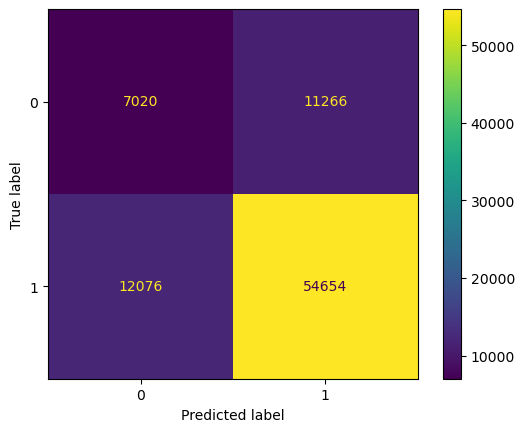

In [54]:
dtc = DecisionTreeClassifier(criterion="entropy", random_state=42)
dtc.fit(x_train, y_train)

train_pred_dtc = dtc.predict(x_train)
test_pred_dtc = dtc.predict(x_test)

train_accuracy_dtc = accuracy_score(y_train, train_pred_dtc)
test_accuracy_dtc = accuracy_score(y_test, test_pred_dtc)

print(classification_report(y_test, test_pred_dtc))
print("Accuracy (DecisionTreeClassifier) - Train: {:.2f}%".format(train_accuracy_dtc * 100))
print("Accuracy (DecisionTreeClassifier) - Test: {:.2f}%".format(test_accuracy_dtc * 100))

cm_dtc = confusion_matrix(y_test, test_pred_dtc)
cmd_dtc = ConfusionMatrixDisplay(cm_dtc, display_labels = labels)
cmd_dtc.plot()

## DecisionTreeClassifier with Hyperparameter Tuning

In [55]:
def paramAccuracy():
    results_accuracy_dt = []
    for i in range(1, 20): 
        dt = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=i)
        dt.fit(x_train,y_train)
        test_pred_dt = dt.predict(x_test)
        test_accuracy_dt = accuracy_score(y_test, test_pred_dt)
        results_accuracy_dt.append((i, test_accuracy_dt))
    return results_accuracy_dt

results_accuracy_dt = paramAccuracy()
for max_depth, accuracy in results_accuracy_dt:    
    print(f"Accuracy for {max_depth} max_depth is:", accuracy)

max_accuracy_dt = max(results_accuracy_dt, key=lambda x:x[1])

Accuracy for 1 max_depth is: 0.7849110755622472
Accuracy for 2 max_depth is: 0.7903453467582573
Accuracy for 3 max_depth is: 0.8003787522348734
Accuracy for 4 max_depth is: 0.7999553025312882
Accuracy for 5 max_depth is: 0.8018843511809541
Accuracy for 6 max_depth is: 0.8024254258022019
Accuracy for 7 max_depth is: 0.8056718735296885
Accuracy for 8 max_depth is: 0.8053307612684671
Accuracy for 9 max_depth is: 0.8051072739249082
Accuracy for 10 max_depth is: 0.8038839747812176
Accuracy for 11 max_depth is: 0.8012138891502776
Accuracy for 12 max_depth is: 0.7992613155170791
Accuracy for 13 max_depth is: 0.79589724287193
Accuracy for 14 max_depth is: 0.79350945704338
Accuracy for 15 max_depth is: 0.7876752611273172
Accuracy for 16 max_depth is: 0.7836760139267902
Accuracy for 17 max_depth is: 0.7792533170226781
Accuracy for 18 max_depth is: 0.7733250211724851
Accuracy for 19 max_depth is: 0.7695374988237508


Best max depth is 7 for DecisionTreeClassifier

In [56]:
param_grid_dt = {'max_depth':range(1,20)}
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
gr = GridSearchCV(dt,param_grid=param_grid_dt, cv=5)
rs = gr.fit(x_train,y_train)
bestHyperParam = rs.best_estimator_.max_depth
print("Using GridSearchCV, best max depth is: ", bestHyperParam)

Using GridSearchCV, best max depth is:  7


              precision    recall  f1-score   support

       False       0.58      0.34      0.43     18286
        True       0.84      0.93      0.88     66730

    accuracy                           0.81     85016
   macro avg       0.71      0.64      0.66     85016
weighted avg       0.78      0.81      0.79     85016

Accuracy (DecisionTreeClassifier after parameter tuning) - Train: 80.65%
Accuracy (DecisionTreeClassifier after parameter tuning) - Test: 80.57%


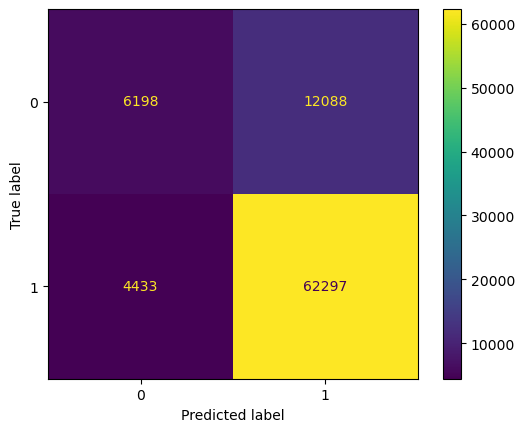

In [57]:
dt_tuned = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=bestHyperParam)
dt_tuned.fit(x_train, y_train)

train_pred_dt_tuned = dt_tuned.predict(x_train)
test_pred_dt_tuned = dt_tuned.predict(x_test)

train_accuracy_dt_tuned = accuracy_score(y_train, train_pred_dt_tuned)
test_accuracy_dt_tuned = accuracy_score(y_test, test_pred_dt_tuned)

print(classification_report(y_test, test_pred_dt_tuned))
print("Accuracy (DecisionTreeClassifier after parameter tuning) - Train: {:.2f}%".format(train_accuracy_dt_tuned * 100))
print("Accuracy (DecisionTreeClassifier after parameter tuning) - Test: {:.2f}%".format(test_accuracy_dt_tuned * 100))

cm_dt_tuned = confusion_matrix(y_test, test_pred_dt_tuned)
cmd_dt_tuned = ConfusionMatrixDisplay(cm_dt_tuned, display_labels = labels)
cmd_dt_tuned.plot()

In [58]:
importances = dt_tuned.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = np.array(X_columns)

sorted_feature_names = feature_names[indices]
print("\nFeature Importances:")
for i, feature_name in enumerate(sorted_feature_names):
    print(f"{i + 1}. {feature_name}: {importances[indices[i]]}")


Feature Importances:
1. Age_Category_6.0: 0.3607254080301335
2. General_Health_4.0: 0.21555926419127067
3. Age_Category_5.0: 0.1394311870560313
4. General_Health_3.0: 0.09729210411067338
5. BMI_4.0: 0.0543141217310893
6. General_Health_2.0: 0.04577732196197314
7. Age_Category_4.0: 0.045012740938137404
8. Smoking_History_1.0: 0.009223688013561547
9. BMI_3.0: 0.008427910193490049
10. Weight_(kg): 0.005594263570728496
11. Vegetables_Consumption: 0.003254184988858385
12. BMI_2.0: 0.003221504611710258
13. Height_(cm): 0.0028770635448796284
14. Fruit_Consumption: 0.0022934170812941167
15. Age_Category_3.0: 0.0020513319375295653
16. Alcohol_Consumption_1.0: 0.00202925352226616
17. FriedPotato_Consumption: 0.0010814629480330044
18. General_Health_1.0: 0.0008629645986829012
19. Sex_2.0: 0.0007109034638107786
20. Age_Category_2.0: 0.0002599035058464837
21. Exercise_1.0: 0.0


## RandomForestClassifier

              precision    recall  f1-score   support

       False       0.52      0.34      0.41     18286
        True       0.83      0.91      0.87     66730

    accuracy                           0.79     85016
   macro avg       0.68      0.63      0.64     85016
weighted avg       0.77      0.79      0.77     85016

Accuracy (RandomForestClassifier) - Train: 99.87%
Accuracy (RandomForestClassifier) - Test: 79.01%


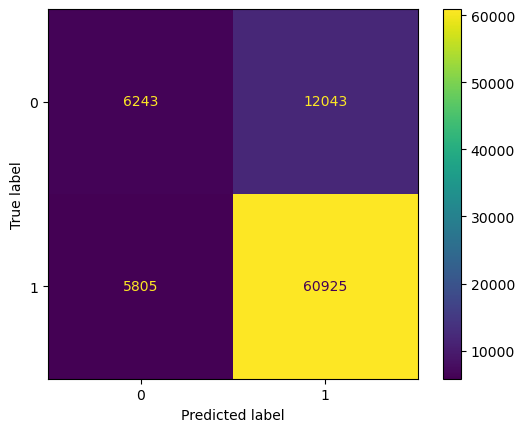

In [96]:
rfc = RandomForestClassifier(n_estimators= 30, random_state=42)
rfc.fit(x_train, y_train)

train_pred_rfc = rfc.predict(x_train)
test_pred_rfc = rfc.predict(x_test)

train_accuracy_rfc = accuracy_score(y_train, train_pred_rfc)
test_accuracy_rfc = accuracy_score(y_test, test_pred_rfc)

print(classification_report(y_test, test_pred_rfc))
print("Accuracy (RandomForestClassifier) - Train: {:.2f}%".format(train_accuracy_rfc * 100))
print("Accuracy (RandomForestClassifier) - Test: {:.2f}%".format(test_accuracy_rfc * 100))

cm_rfc = confusion_matrix(y_test, test_pred_rfc)
cmd_rfc = ConfusionMatrixDisplay(cm_rfc, display_labels = labels)
cmd_rfc.plot()

## Boosting: XGBClassifier 

              precision    recall  f1-score   support

       False       0.51      0.30      0.38     18286
        True       0.83      0.92      0.87     66730

    accuracy                           0.79     85016
   macro avg       0.67      0.61      0.62     85016
weighted avg       0.76      0.79      0.77     85016

Accuracy (XGBClassifier) - Train: 82.17%
Accuracy (XGBClassifier) - Test: 78.69%


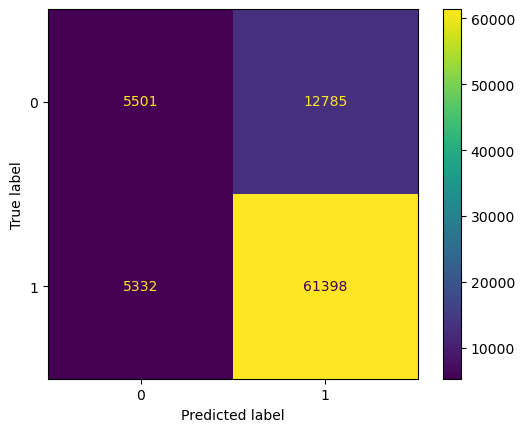

In [97]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

train_pred_xgb = xgb.predict(x_train)
test_pred_xgb = xgb.predict(x_test)

train_accuracy_xgb = accuracy_score(y_train, train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, test_pred_xgb)

print(classification_report(y_test, test_pred_xgb))
print("Accuracy (XGBClassifier) - Train: {:.2f}%".format(train_accuracy_xgb * 100))
print("Accuracy (XGBClassifier) - Test: {:.2f}%".format(test_accuracy_xgb * 100))

cm_xgb = confusion_matrix(y_test, test_pred_xgb)
cmd_xgb = ConfusionMatrixDisplay(cm_xgb, display_labels = labels)
cmd_xgb.plot()

 ## Boosting: LGBMClassifier

[LightGBM] [Info] Number of positive: 156131, number of negative: 42238
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 198369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.787074 -> initscore=1.307375
[LightGBM] [Info] Start training from score 1.307375
              precision    recall  f1-score   support

       False       0.60      0.32      0.41     18286
        True       0.83      0.94      0.88     66730

    accuracy                           0.81     85016
   macro avg       0.72      0.63      0.65     85016
weighted avg       0.78      0.81      0.78     85016

Accuracy (LGBMClassifier) - Train: 81.11%
Accuracy (LGBMClassifier) - Test: 80.70%


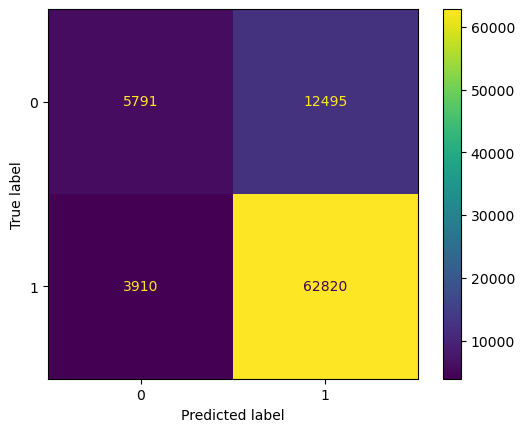

In [59]:
lgbc = lgb.LGBMClassifier(force_row_wise=True)
lgbc.fit(x_train, y_train)

train_pred_lgbc = lgbc.predict(x_train)
test_pred_lgbc = lgbc.predict(x_test)

train_accuracy_lgbc = accuracy_score(y_train, train_pred_lgbc)
test_accuracy_lgbc = accuracy_score(y_test, test_pred_lgbc)

print(classification_report(y_test, test_pred_lgbc))
print("Accuracy (LGBMClassifier) - Train: {:.2f}%".format(train_accuracy_lgbc * 100))
print("Accuracy (LGBMClassifier) - Test: {:.2f}%".format(test_accuracy_lgbc * 100))

cm_lgbc = confusion_matrix(y_test, test_pred_lgbc)
cmd_lgbc = ConfusionMatrixDisplay(cm_lgbc, display_labels = labels)
cmd_lgbc.plot()

In [60]:
importances = lgbc.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = np.array(X_columns)
sorted_feature_names = feature_names[indices]

print("\nFeature Importances:")
for i, feature_name in enumerate(sorted_feature_names):
    print(f"{i + 1}. {feature_name}: {importances[indices[i]]}")


Feature Importances:
1. Weight_(kg): 532
2. Vegetables_Consumption: 402
3. Fruit_Consumption: 366
4. Height_(cm): 292
5. FriedPotato_Consumption: 213
6. General_Health_1.0: 137
7. Sex_2.0: 111
8. Smoking_History_1.0: 97
9. General_Health_4.0: 91
10. General_Health_3.0: 87
11. BMI_4.0: 85
12. Alcohol_Consumption_1.0: 81
13. Age_Category_4.0: 79
14. Age_Category_6.0: 75
15. General_Health_2.0: 72
16. Age_Category_5.0: 71
17. Exercise_1.0: 46
18. BMI_3.0: 46
19. BMI_2.0: 44
20. Age_Category_3.0: 39
21. Age_Category_2.0: 34


## Boosting: LGBMClassifier with Hyperparameter Tuning

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.7 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.7 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 156131, number of negative: 42238
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 198369, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.787074 -> initscore=1.307375
[

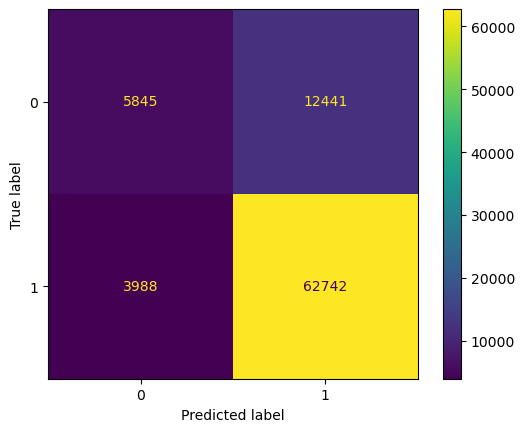

In [99]:
# Define the parameter grid
param_distributions = {
    'num_leaves': [20, 31, 40, 50, 60, 70, 80, 90, 100, 127],
    'reg_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_data_in_leaf': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400],
    'lambda_l1': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0],
    'lambda_l2': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    lgb.LGBMClassifier(force_row_wise=True),
    param_distributions,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Perform hyperparameter tuning
random_search.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Highest accuracy found: ", random_search.best_score_)

# Predict using the model with the best parameters
train_pred_lgbc_tuned = random_search.predict(x_train)
test_pred_lgbc_tuned = random_search.predict(x_test)

# Compute the accuracy
train_accuracy_lgbc_tuned = accuracy_score(y_train, train_pred_lgbc_tuned)
test_accuracy_lgbc_tuned = accuracy_score(y_test, test_pred_lgbc_tuned)

# Print the results
print(classification_report(y_test, test_pred_lgbc_tuned))
print("Accuracy (LGBMClassifier after parameter tuning) - Train: {:.2f}%".format(train_accuracy_lgbc_tuned * 100))
print("Accuracy (LGBMClassifier after parameter tuning) - Test: {:.2f}%".format(test_accuracy_lgbc_tuned * 100))

cm_lgbc_tuned = confusion_matrix(y_test, test_pred_lgbc_tuned)
cmd_lgbc_tuned = ConfusionMatrixDisplay(cm_lgbc_tuned, display_labels = labels)
cmd_lgbc_tuned.plot()

## AdaBoostClassifier


              precision    recall  f1-score   support

       False       0.41      0.37      0.39     18286
        True       0.83      0.85      0.84     66730

    accuracy                           0.75     85016
   macro avg       0.62      0.61      0.61     85016
weighted avg       0.74      0.75      0.74     85016

Accuracy (AdaBoost) - Training: 99.99%
Accuracy (AdaBoost) - Test: 74.81%


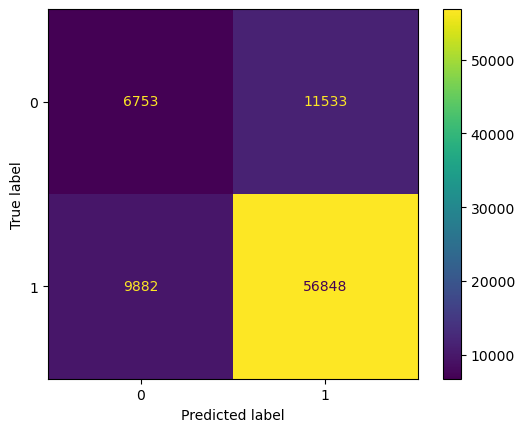

In [100]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(x_train, y_train)

train_pred_ada = ada.predict(x_train)
test_pred_ada = ada.predict(x_test)

train_accuracy_ada = accuracy_score(y_train, train_pred_ada)
test_accuracy_ada = accuracy_score(y_test, test_pred_ada)

print(classification_report(y_test, test_pred_ada))
print("Accuracy (AdaBoost) - Training: {:.2f}%".format(train_accuracy_ada * 100))
print("Accuracy (AdaBoost) - Test: {:.2f}%".format(test_accuracy_ada * 100))

cm_ada = confusion_matrix(y_test, test_pred_ada)
cmd_ada = ConfusionMatrixDisplay(cm_ada, display_labels = labels)
cmd_ada.plot()

## SVM

              precision    recall  f1-score   support

       False       0.62      0.25      0.36     18286
        True       0.82      0.96      0.89     66730

    accuracy                           0.81     85016
   macro avg       0.72      0.60      0.62     85016
weighted avg       0.78      0.81      0.77     85016

Accuracy (linear SVM) - Training: 99.99%
Accuracy (linear SVM) - Test: 80.58%


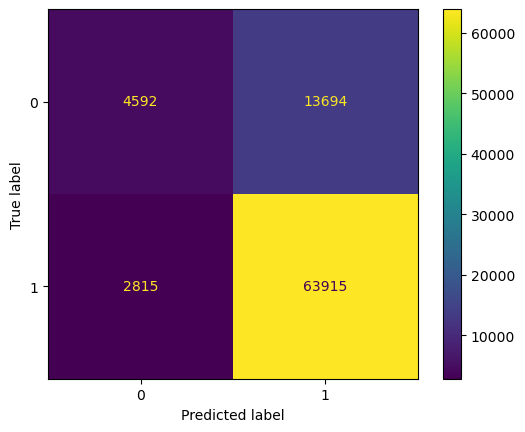

In [101]:
svm = LinearSVC()
svm.fit(x_train, y_train)

train_pred_svm = svm.predict(x_train)
test_pred_svm = svm.predict(x_test)

train_accuracy_svm = accuracy_score(y_train, train_pred_ada)
test_accuracy_svm = accuracy_score(y_test, test_pred_svm)

print(classification_report(y_test, test_pred_svm))
print("Accuracy (linear SVM) - Training: {:.2f}%".format(train_accuracy_svm * 100))
print("Accuracy (linear SVM) - Test: {:.2f}%".format(test_accuracy_svm * 100))

cm_svm = confusion_matrix(y_test, test_pred_svm)
cmd_svm = ConfusionMatrixDisplay(cm_svm, display_labels = labels)
cmd_svm.plot()

**Hyperparameter Tuning** : Now to improve accuracy we perform a randomized search over a distribution of values for the C and loss parameters of LinearSVC, using 5-fold cross-validation. It then fits the best model to the data, makes predictions, and calculates and prints the accuracy scores.

              precision    recall  f1-score   support

       False       0.62      0.25      0.36     18286
        True       0.82      0.96      0.89     66730

    accuracy                           0.81     85016
   macro avg       0.72      0.60      0.62     85016
weighted avg       0.78      0.81      0.77     85016

Accuracy (linear SVM after parameter tuning) - Training: 80.69%
Accuracy (linear SVM after parameter tuning) - Test: 80.57%


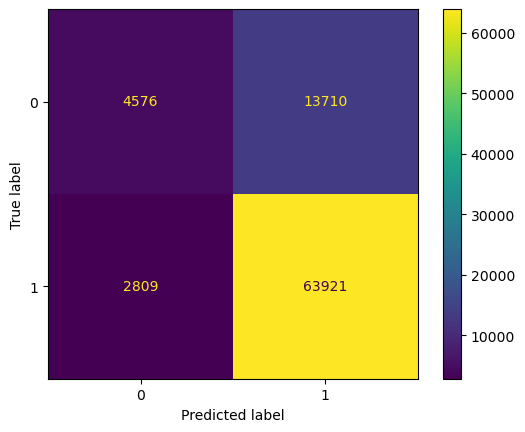

In [102]:
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'loss': ['hinge', 'squared_hinge']
}

random_search = RandomizedSearchCV(LinearSVC(), param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

random_search.fit(x_train, y_train)

svm_tuned = random_search.best_estimator_

train_pred_svm_tuned = svm_tuned.predict(x_train)
test_pred_svm_tuned = svm_tuned.predict(x_test)

train_accuracy_svm_tuned = accuracy_score(y_train, train_pred_svm_tuned)
test_accuracy_svm_tuned = accuracy_score(y_test, test_pred_svm_tuned)


print(classification_report(y_test, test_pred_svm_tuned))
print("Accuracy (linear SVM after parameter tuning) - Training: {:.2f}%".format(train_accuracy_svm_tuned * 100))
print("Accuracy (linear SVM after parameter tuning) - Test: {:.2f}%".format(test_accuracy_svm_tuned * 100))

cm_svm_tuned = confusion_matrix(y_test, test_pred_svm_tuned)
cmd_svm_tuned = ConfusionMatrixDisplay(cm_svm_tuned, display_labels = labels)
cmd_svm_tuned.plot()

In [119]:
accuracies_test = [test_accuracy_dtc * 100, train_accuracy_dt_tuned * 100, test_accuracy_rfc * 100, test_accuracy_xgb * 100, test_accuracy_lgbc * 100, test_accuracy_lgbc_tuned * 100, test_accuracy_ada * 100, test_accuracy_svm * 100, test_accuracy_svm_tuned * 100]
accuracies_train = [train_accuracy_dtc * 100, train_accuracy_dt_tuned * 100, train_accuracy_rfc * 100, train_accuracy_xgb * 100, train_accuracy_lgbc * 100, train_accuracy_lgbc_tuned * 100, train_accuracy_ada * 100, train_accuracy_svm * 100, train_accuracy_svm_tuned * 100]
models = ["DecisionTreeClassifier", "DecisionTreeClassifier_Tuned", "RandomForestClassifier", "XGBClassifier", "LGBMClassifier", "LGBMClassifier_Tuned", "AdaBoostClassifier", "LinearSVM", "LinearSVM_Tuned"]

# Create the DataFrame
df_accuracies = pd.DataFrame({
    'Model': models,
    'Accuracy_Train': accuracies_train,
    'Accuracy_Test': accuracies_test
})

df_accuracies['Accuracy_Train'] = df_accuracies['Accuracy_Train'].round(2)
df_accuracies['Accuracy_Test'] = df_accuracies['Accuracy_Test'].round(2)
df_accuracies = df_accuracies.sort_values(by='Accuracy_Test', ascending=False).reset_index(drop=True)

df_accuracies

,Model,Accuracy_Train,Accuracy_Test
0,LGBMClassifier,81.11,80.70
1,LGBMClassifier_Tuned,80.89,80.68
2,DecisionTreeClassifier_Tuned,80.65,80.65
3,LinearSVM,99.99,80.58
4,LinearSVM_Tuned,80.69,80.57
5,RandomForestClassifier,99.87,79.01
6,XGBClassifier,82.17,78.69
7,AdaBoostClassifier,99.99,74.81
8,DecisionTreeClassifier,99.99,72.54


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'LGBMClassifier'),
  Text(1, 0, 'LGBMClassifier_Tuned'),
  Text(2, 0, 'DecisionTreeClassifier_Tuned'),
  Text(3, 0, 'LinearSVM'),
  Text(4, 0, 'LinearSVM_Tuned'),
  Text(5, 0, 'RandomForestClassifier'),
  Text(6, 0, 'XGBClassifier'),
  Text(7, 0, 'AdaBoostClassifier'),
  Text(8, 0, 'DecisionTreeClassifier')])

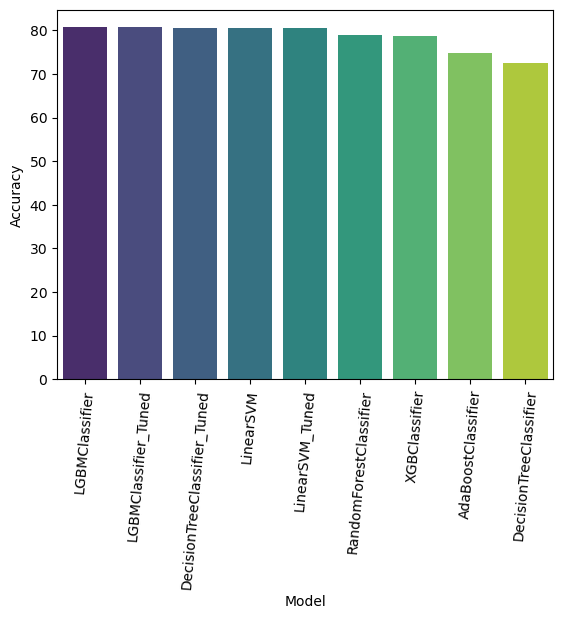

In [104]:
sns.barplot(x='Model', y='Accuracy', data=df_accuracies, ci=None, palette='viridis')
plt.xticks(rotation=85)

In [120]:
predictions = [test_pred_dtc, test_pred_dt_tuned, test_pred_rfc, test_pred_xgb, test_pred_lgbc, test_pred_lgbc_tuned, test_pred_ada, test_pred_svm, test_pred_svm_tuned]
df_list = []

for model_name, prediction in zip(models, predictions):
    report = classification_report(y_test, prediction, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    # Exclude the 'support' column and rows for 'micro avg', 'macro avg', 'weighted avg'
    report_df = report_df.drop(columns='support').drop(['micro avg', 'macro avg', 'weighted avg'], errors='ignore')
    # Flatten the DataFrame and add the model name
    flat_report = report_df.unstack().to_frame().T
    flat_report.columns = ['_'.join(col) for col in flat_report.columns]
    flat_report['model_name'] = model_name
    df_list.append(flat_report)

# Concatenate all the dataframes in the list
df_cr = pd.concat(df_list)
df_cr.set_index('model_name', inplace=True)
df_cr = df_cr.round(2)
df_accuracies.set_index('Model', inplace=True)

# Merge df_cr and df_accuracies
df_final = df_cr.merge(df_accuracies, left_index=True, right_index=True)

# Sort df_final according to 'Accuracy_Test'
df_final.sort_values('Accuracy_Test', ascending=False, inplace=True)

df_final

,precision_False,precision_True,precision_accuracy,recall_False,recall_True,recall_accuracy,f1-score_False,f1-score_True,f1-score_accuracy,Accuracy_Train,Accuracy_Test
LGBMClassifier,0.60,0.83,0.81,0.32,0.94,0.81,0.41,0.88,0.81,81.11,80.70
LGBMClassifier_Tuned,0.59,0.83,0.81,0.32,0.94,0.81,0.42,0.88,0.81,80.89,80.68
DecisionTreeClassifier_Tuned,0.58,0.84,0.81,0.34,0.93,0.81,0.43,0.88,0.81,80.65,80.65
LinearSVM,0.62,0.82,0.81,0.25,0.96,0.81,0.36,0.89,0.81,99.99,80.58
LinearSVM_Tuned,0.62,0.82,0.81,0.25,0.96,0.81,0.36,0.89,0.81,80.69,80.57
RandomForestClassifier,0.52,0.83,0.79,0.34,0.91,0.79,0.41,0.87,0.79,99.87,79.01
XGBClassifier,0.51,0.83,0.79,0.30,0.92,0.79,0.38,0.87,0.79,82.17,78.69
AdaBoostClassifier,0.41,0.83,0.75,0.37,0.85,0.75,0.39,0.84,0.75,99.99,74.81
DecisionTreeClassifier,0.37,0.83,0.73,0.38,0.82,0.73,0.38,0.82,0.73,99.99,72.54


In [114]:
X_columns

['Height_(cm)',
 'Weight_(kg)',
 'Fruit_Consumption',
 'Vegetables_Consumption',
 'FriedPotato_Consumption',
 'General_Health_1.0',
 'General_Health_2.0',
 'General_Health_3.0',
 'General_Health_4.0',
 'Exercise_1.0',
 'Sex_2.0',
 'Age_Category_2.0',
 'Age_Category_3.0',
 'Age_Category_4.0',
 'Age_Category_5.0',
 'Age_Category_6.0',
 'BMI_2.0',
 'BMI_3.0',
 'BMI_4.0',
 'Smoking_History_1.0',
 'Alcohol_Consumption_1.0']

In [ ]:
'General_Health', 
'Exercise', 
'Heart_Disease', 
'Skin_Cancer', 
'Other_Cancer', 
'Depression', 
'Diabetes', 
'Sex', 
'Age_Category', 
'Height_(cm)', 
'Weight_(kg)', 
'BMI', 
'Smoking_History', 
'Alcohol_Consumption', 
'Fruit_Consumption', 
'Vegetables_Consumption', 
'FriedPotato_Consumption', 
"Hypertension", 
'Arthritis', 
'High_Cholesterol', 
'Asthma'

In [124]:
Lifestyle_Diseases = ["Heart_Disease", "Skin_Cancer", "Other_Cancer", "Depression", "Diabetes", "Hypertension", "Arthritis", "High_Cholesterol", "Asthma"]
print("Lifestyle Diseases:")
Lifestyle_Diseases

Lifestyle Diseases:


['Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Hypertension',
 'Arthritis',
 'High_Cholesterol',
 'Asthma']